In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error


In [3]:
electricity_consumption = pd.read_csv('total-electricity-consumption-us.csv')

In [4]:
electricity_consumption.shape

(51, 2)

In [5]:
electricity_consumption.head()

,Year,Consumption
0,1920,57125
1,1921,53656
2,1922,61816
3,1923,72113
4,1924,76651


In [6]:
electricity_consumption.isnull().any()

Year           False
Consumption    False
dtype: bool

In [7]:
X = electricity_consumption['Year']
y = electricity_consumption['Consumption']

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 1)
(40, 1)
(11, 1)
(11, 1)


In [9]:
# size = electricity_consumption.shape[0]
# index = range(0,size,5)
# train = electricity_consumption[~electricity_consumption.index.isin(index)]
# test = electricity_consumption[electricity_consumption.index.isin(index)]

# print(train.shape)
# print(test.shape)



# X_train,y_train = train['Year'],train['Consumption']
# X_test,y_test = test['Year'],test['Consumption']

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

# X_train = np.array(X_train).reshape(-1,1)
# X_test = np.array(X_test).reshape(-1,1)

# y_train = np.array(y_train).reshape(-1,1)
# y_test = np.array(y_test).reshape(-1,1)

# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)



# # Pipeline.named_steps

__________________________________________________________________________________________


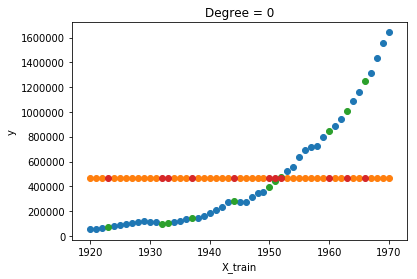

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
__________________________________________________________________________________________
__________________________________________________________________________________________


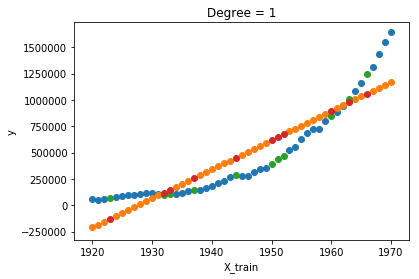

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
__________________________________________________________________________________________
__________________________________________________________________________________________


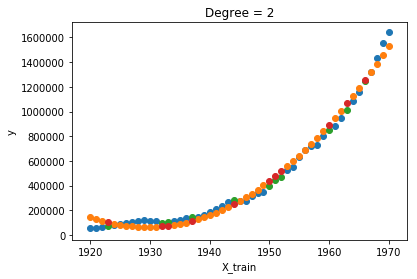

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
__________________________________________________________________________________________
__________________________________________________________________________________________


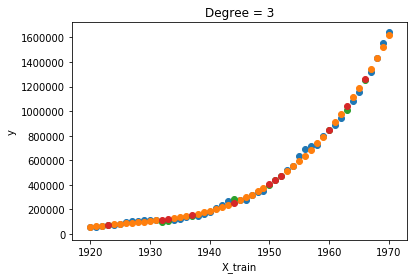

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
__________________________________________________________________________________________
__________________________________________________________________________________________


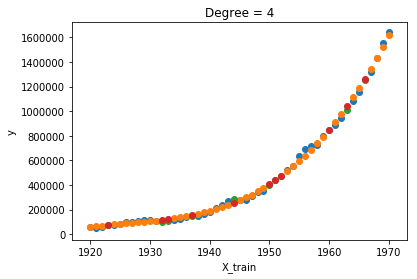

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
__________________________________________________________________________________________
__________________________________________________________________________________________


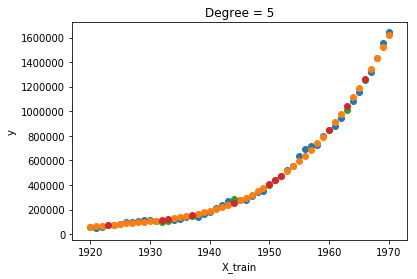

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
__________________________________________________________________________________________
__________________________________________________________________________________________


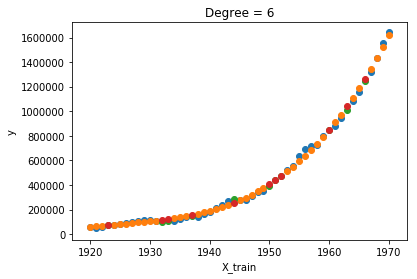

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
__________________________________________________________________________________________
__________________________________________________________________________________________


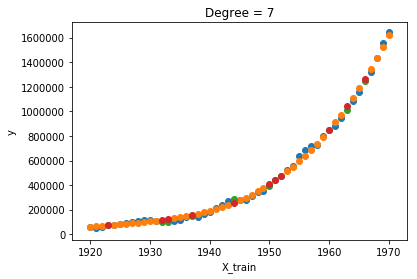

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
__________________________________________________________________________________________
__________________________________________________________________________________________


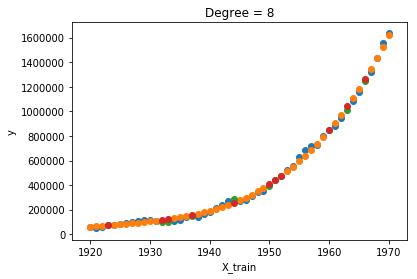

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
__________________________________________________________________________________________
__________________________________________________________________________________________


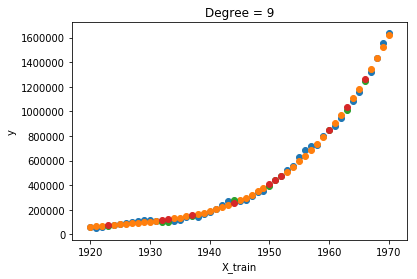

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
__________________________________________________________________________________________


In [10]:
degrees = list(range(0,10,1))
train_scores = []
test_scores = []
train_errors = []
test_errors = []
for degree in degrees:
    pipeline = Pipeline([("Poly_features",PolynomialFeatures(degree=degree)),
                    ("model",LinearRegression())])
    pipeline.fit(X_train,y_train)
    
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    train_scores.append(r2_score(y_train,y_pred_train))
    test_scores.append(r2_score(y_test,y_pred_test))
    train_errors.append(mean_squared_error(y_train,y_pred_train))
    test_errors.append(mean_squared_error(y_test,y_pred_test))
    model = pipeline.named_steps["model"]
   
    print("___"*30)
    fig,ax = plt.subplots()
    
    ax.set_title("Degree = {}".format(str(degree)))
    ax.set_xlabel("X_train")
    ax.set_ylabel("y")
    ax.scatter(X_train,y_train)
    ax.scatter(X_train, y_pred_train)
    
    ax.scatter(X_test,y_test)
    ax.scatter(X_test,y_pred_test)
    plt.show()
     
    print(model.get_params())
    print("___"*30)


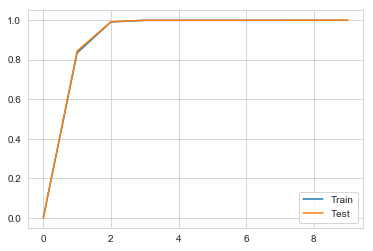

In [11]:
sns.set_style('whitegrid')
plt.plot(degrees,train_scores)
plt.plot(degrees,test_scores)
plt.legend(['Train','Test'])

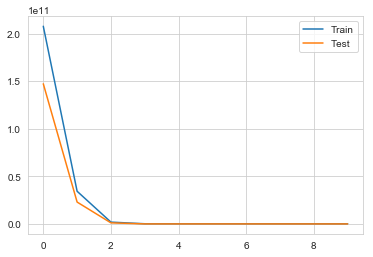

In [12]:
sns.set_style('whitegrid')
plt.plot(degrees,train_errors)
plt.plot(degrees,test_errors)
plt.legend(['Train','Test'])